# Studying One Sample

This notebook will focus on one sample and compare it to the entire dataset.

In [10]:
# Libraries
library(dplyr)
library(ggplot2)
library(reshape2)
library(repr)
library(moments)
library(gridExtra)
set.seed(8)

In [3]:
# 00. Acquire the Data Set
bostonURL <- url("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
boston <- read.table(bostonURL)
colnames(boston) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV")

In [4]:
# Boston Data Set Statistics
bostonStats = data.frame(feature = colnames(boston))
bostonStats['mean'] = sapply(boston, mean)
bostonStats['sd'] = sapply(boston, sd)
bostonStats['skewness'] = sapply(boston, skewness)

### Comparing Sample vs. Data Set

In [5]:
sample <- sample_n(boston, 5)

In [6]:
# Difference between sample means and entire data set means
diff <- colMeans(sample) - bostonStats$mean
zScore <- diff / bostonStats$sd
data.frame(boston_mean = bostonStats$mean, sample_mean = colMeans(sample), difference = diff, Z_Score = zScore)

,boston_mean,sample_mean,difference,Z_Score
CRIM,3.61352356,5.395228,1.781704443,0.207137720
ZN,11.36363636,0.000000,-11.363636364,-0.487240187
INDUS,11.13677866,11.964000,0.827221344,0.120579998
CHAS,0.06916996,0.000000,-0.069169960,-0.272329068
NOX,0.55469506,0.563600,0.008904941,0.076847768
RM,6.28463439,6.234800,-0.049834387,-0.070926802
AGE,68.57490119,76.400000,7.825098814,0.277989887
DIS,3.79504269,3.032500,-0.762542688,-0.362130893
RAD,9.54940711,9.400000,-0.149407115,-0.017158914
TAX,408.23715415,409.400000,1.162845850,0.006899643


### Heat Maps

In [7]:
# Prep points to be plotted
sampleZScore <- t(sample - bostonStats$mean) / bostonStats$sd
sample_df <- data.frame(t(sample), feature = colnames(boston))
sampleZScore_df <- data.frame(sampleZScore, feature = colnames(boston))

Using feature as id variables
Using feature as id variables


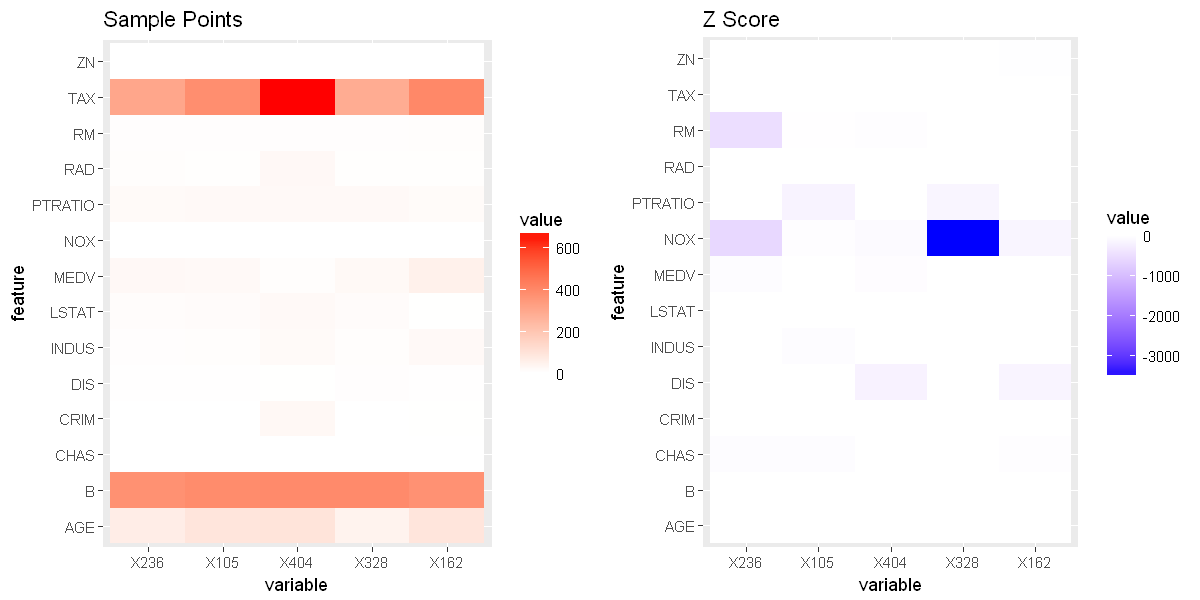

In [8]:
# Plot Sample Points
plot1 <- ggplot(melt(sample_df), aes(x = variable, y = feature, fill = value)) + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red") +
    ggtitle("Sample Points")

# Plot Z-Scores
plot2 <- ggplot(melt(sampleZScore_df), aes(x = variable, y = feature, fill = value)) + 
    geom_tile() + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red") +
    ggtitle("Z Score")

options(repr.plot.width = 10, repr.plot.height = 5)
grid.arrange(plot1, plot2, ncol=2)

### Bar Plots 

Using feature as id variables


Using feature as id variables


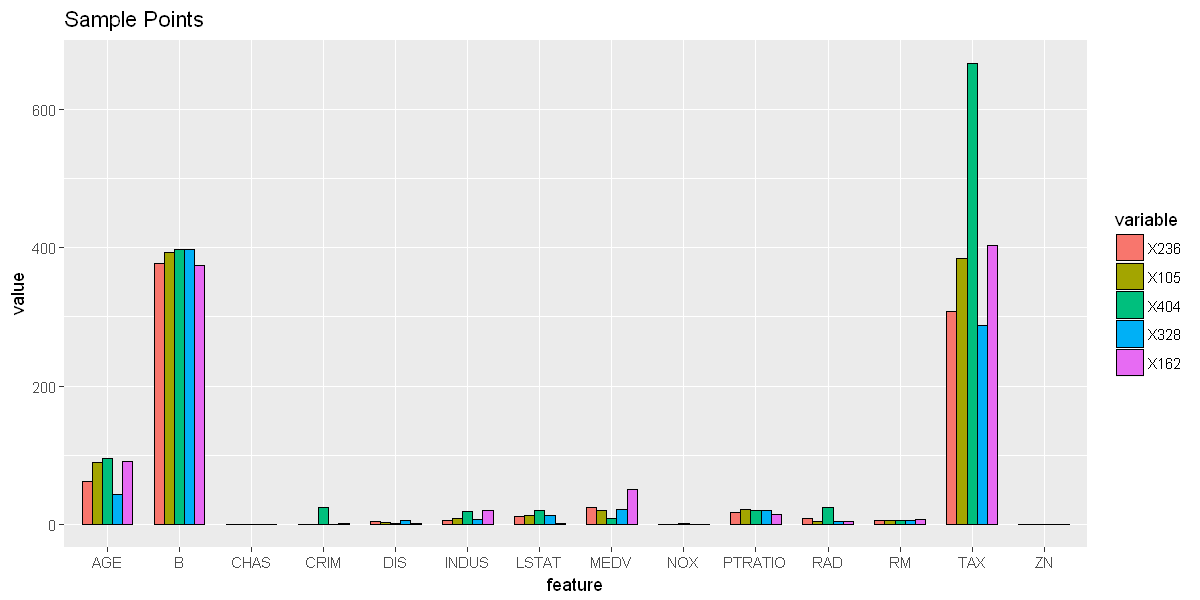

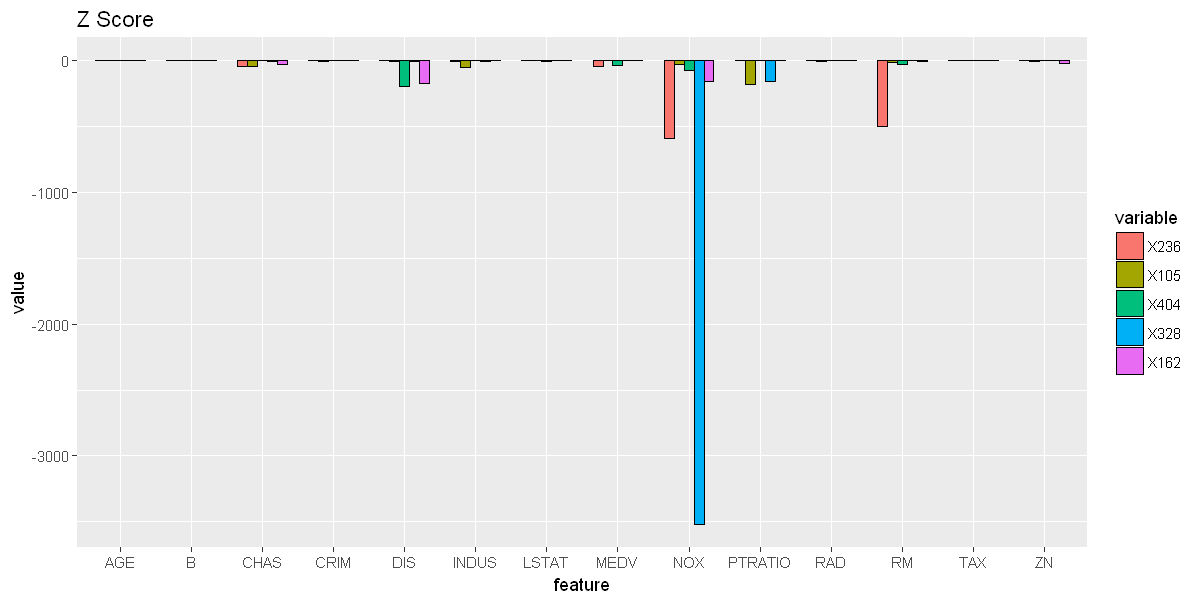

In [9]:
# Plot Sample Points
ggplot(melt(sample_df), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(color="black", stat = "identity", width=0.7, position = "dodge") + 
    ggtitle("Sample Points")

# Plot Z-Score Points
ggplot(melt(sampleZScore_df), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(color="black", stat = "identity", width=0.7, position = "dodge") + 
    ggtitle("Z Score")

### Speculations

Sample 470: This location seems to be a high crime location populated by the lower status, but close to many radical highways.   
Sample 1: This seems like a more affluent and very safe neighboorhood.   
Sample 134: This seems like location with lots of local businesses but occupied by the lower class.
Sample 140: similar to 134  
Sample 262: Residential area with high median value of owner-occupied homes  

Just from the histogram and heatmap alone, it is difficult to define the relationships between different variables. A pairs plot would provide greater insights into the correlation between variables.